In [1]:
#library
import tensorflow as tf
print("Tensorflow version " + tf.__version__)
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
from matplotlib import pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

#untuk visualisasi
import cv2 
import matplotlib.pyplot as plt
import numpy as np

Tensorflow version 2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load data

In [3]:
base_dir = "/content/drive/Shareddrives/flowers"
os.listdir(base_dir)

['daisy', 'dandelion', 'sunflower']

#visualisasi

In [7]:
kelas = ['daisy', 'dandelion', 'sunflower'] #kelas/category

data=[]
for category in kelas:
  folder = os.path.join(base_dir, category)
  file_names = os.listdir(folder)
  full_path = [os.path.join(folder, file_name) for file_name in file_names]
  data.append(full_path)

dim = (320, 240)
images = []
resized_images = []
for names in data:
  one_category_images = [cv2.imread(name,0) for name in names]
  images.append(one_category_images)
  for i in range(len(one_category_images)):
        res = cv2.resize(one_category_images[i], dim, interpolation=cv2.INTER_LINEAR)
        resized_images.append(res)

contoh citra setiap kelas


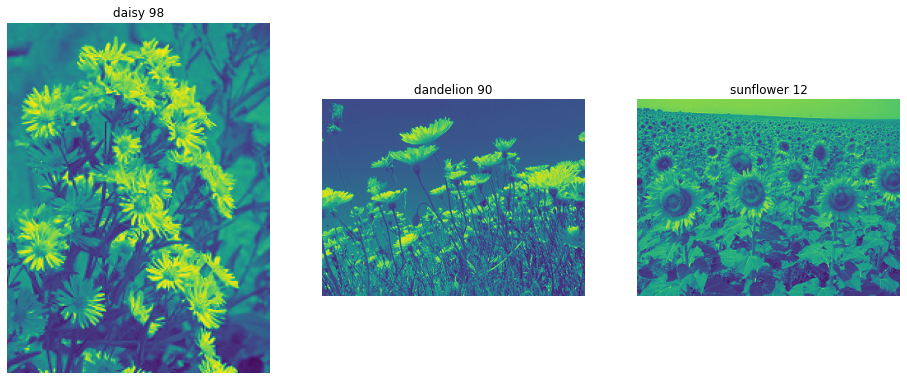

In [8]:
#visualisasi contoh data
print("contoh citra setiap kelas")
index = []
plt.figure(figsize=(16,12))
for i, imgs in enumerate(images):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    idx = np.random.randint(len(imgs))
    plt.imshow(imgs[idx])
    plt.title(kelas[i]+' '+str(idx))
    index.append(idx)
plt.show()

contoh citra setiap kelas dalam grayscale setelah resized


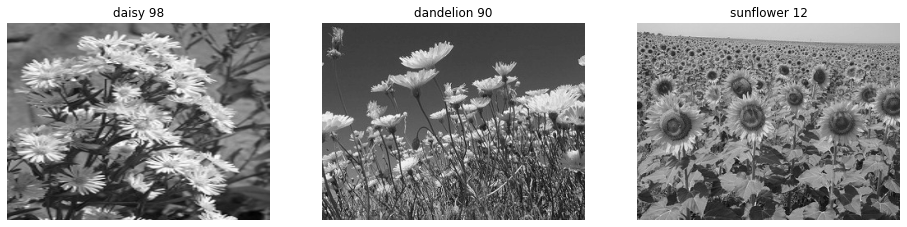

In [9]:
print("contoh citra setiap kelas dalam grayscale setelah resized")
plt.figure(figsize=(16,12))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.axis('off')
  plt.title(kelas[i]+' '+str(index[i]))
  plt.imshow(resized_images[i*100+index[i]], cmap='gray')
plt.show()

# augmentasi image

In [5]:
# melakukan proses augmentasi gambar 
train_datagen = ImageDataGenerator(
                    rescale=1./255,                   
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest',                    
                    validation_split=0.2)

#data generator

In [6]:
# menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari model
train_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(320, 240), # mengubah  resolusi seluruh gambar menjadi 320 x 240 piksel
        color_mode = 'grayscale',
        batch_size=4,
        class_mode='categorical', # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(320, 240), # mengubah  resolusi seluruh gambar menjadi 320 x 240 piksel
        color_mode = 'grayscale',
        batch_size=4, 
        class_mode='categorical',# karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        subset='validation')


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


#model

In [ ]:

# membangun arsitektur CNN
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (320,240,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# print model layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 238, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 76, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 136192)            0

#learning rate 0.1

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# compile model dengan 'RMSprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              #optimizer=tf.optimizers.Adam(),
              optimizer = RMSprop(learning_rate=0.1),
              metrics=['accuracy'])
 
# latih model 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=50, 
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2)

Epoch 1/50
25/25 - 58s - loss: 102685912.0000 - accuracy: 0.3400 - val_loss: 2.4229 - val_accuracy: 0.2500
Epoch 2/50
25/25 - 57s - loss: 2.6171 - accuracy: 0.3400 - val_loss: 1.4264 - val_accuracy: 0.4000
Epoch 3/50
25/25 - 58s - loss: 1.1599 - accuracy: 0.3900 - val_loss: 1.1156 - val_accuracy: 0.3000
Epoch 4/50
25/25 - 53s - loss: 1.2363 - accuracy: 0.3100 - val_loss: 1.0458 - val_accuracy: 0.2000
Epoch 5/50
25/25 - 54s - loss: 34.4685 - accuracy: 0.3500 - val_loss: 1.0648 - val_accuracy: 0.3000
Epoch 6/50
25/25 - 54s - loss: 2.2774 - accuracy: 0.3900 - val_loss: 1.0716 - val_accuracy: 0.5000
Epoch 7/50
25/25 - 54s - loss: 1.1079 - accuracy: 0.3500 - val_loss: 1.0540 - val_accuracy: 0.4500
Epoch 8/50
25/25 - 53s - loss: 1.1405 - accuracy: 0.3100 - val_loss: 1.0644 - val_accuracy: 0.4500
Epoch 9/50
25/25 - 53s - loss: 1.1286 - accuracy: 0.3300 - val_loss: 1.1212 - val_accuracy: 0.3000
Epoch 10/50
25/25 - 53s - loss: 1.1026 - accuracy: 0.4300 - val_loss: 1.0890 - val_accuracy: 0.4000


plot akurasi

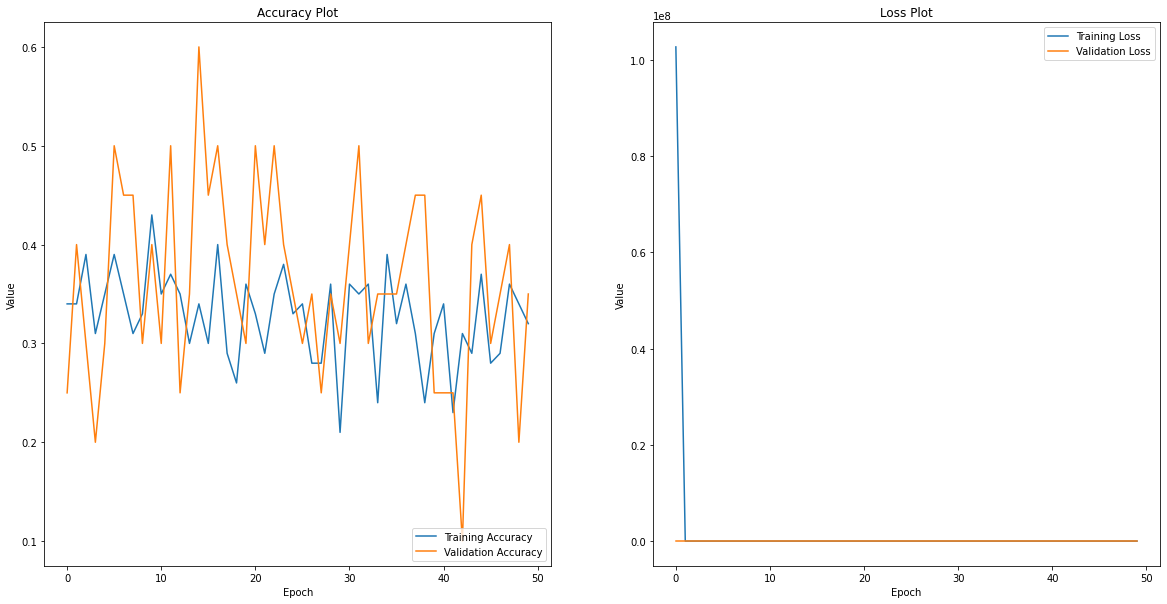

In [ ]:
#plot accuracy train & validation
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

# ===============

#plot loss train dan validation
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

#learning rate 0.8

In [ ]:
# compile model dengan 'RMSprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              #optimizer=tf.optimizers.Adam(),
              optimizer = RMSprop(learning_rate=0.8),
              metrics=['accuracy'])
 
# latih model 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=50, 
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2)

Epoch 1/50
25/25 - 57s - loss: 1.4925 - accuracy: 0.2900 - val_loss: 1.4770 - val_accuracy: 0.4500
Epoch 2/50
25/25 - 56s - loss: 1.3964 - accuracy: 0.3400 - val_loss: 1.2250 - val_accuracy: 0.3000
Epoch 3/50
25/25 - 55s - loss: 1.2658 - accuracy: 0.3200 - val_loss: 1.3040 - val_accuracy: 0.4000
Epoch 4/50
25/25 - 56s - loss: 1.3337 - accuracy: 0.3200 - val_loss: 1.3952 - val_accuracy: 0.3500
Epoch 5/50
25/25 - 56s - loss: 1.2846 - accuracy: 0.3300 - val_loss: 1.0873 - val_accuracy: 0.4000
Epoch 6/50
25/25 - 56s - loss: 1.3065 - accuracy: 0.2900 - val_loss: 1.2043 - val_accuracy: 0.4000
Epoch 7/50
25/25 - 55s - loss: 1.2576 - accuracy: 0.4100 - val_loss: 1.2975 - val_accuracy: 0.3500
Epoch 8/50
25/25 - 56s - loss: 1.2735 - accuracy: 0.3300 - val_loss: 1.2240 - val_accuracy: 0.2000
Epoch 9/50
25/25 - 55s - loss: 1.2872 - accuracy: 0.3600 - val_loss: 1.1878 - val_accuracy: 0.3000
Epoch 10/50
25/25 - 55s - loss: 1.2259 - accuracy: 0.3900 - val_loss: 1.1213 - val_accuracy: 0.3500
Epoch 11/

plot akurasi dan error

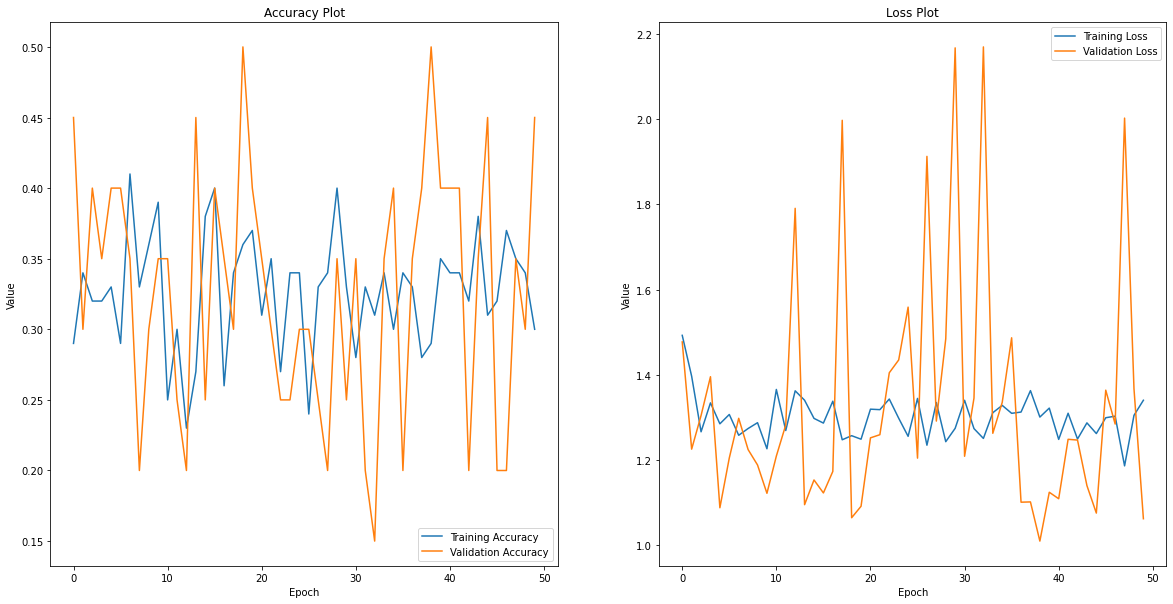

In [ ]:
#plot accuracy train & validation
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

# ===============

#plot loss train dan validation
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()